In [1]:
%matplotlib nbagg
import copy
from utils import import_data
from markowitz import OptimizedPortfolio
from matplotlib import style
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import the data
p, mv, rf = import_data()
data = dict(prices=copy.deepcopy(p), mv=copy.deepcopy(mv), rf=copy.deepcopy(rf))

In [3]:
main_dir: str = 'C:/Users/YBant/Desktop/backtests_1705/'

	Iteration over 214 windows:
	

<IPython.core.display.Javascript object>


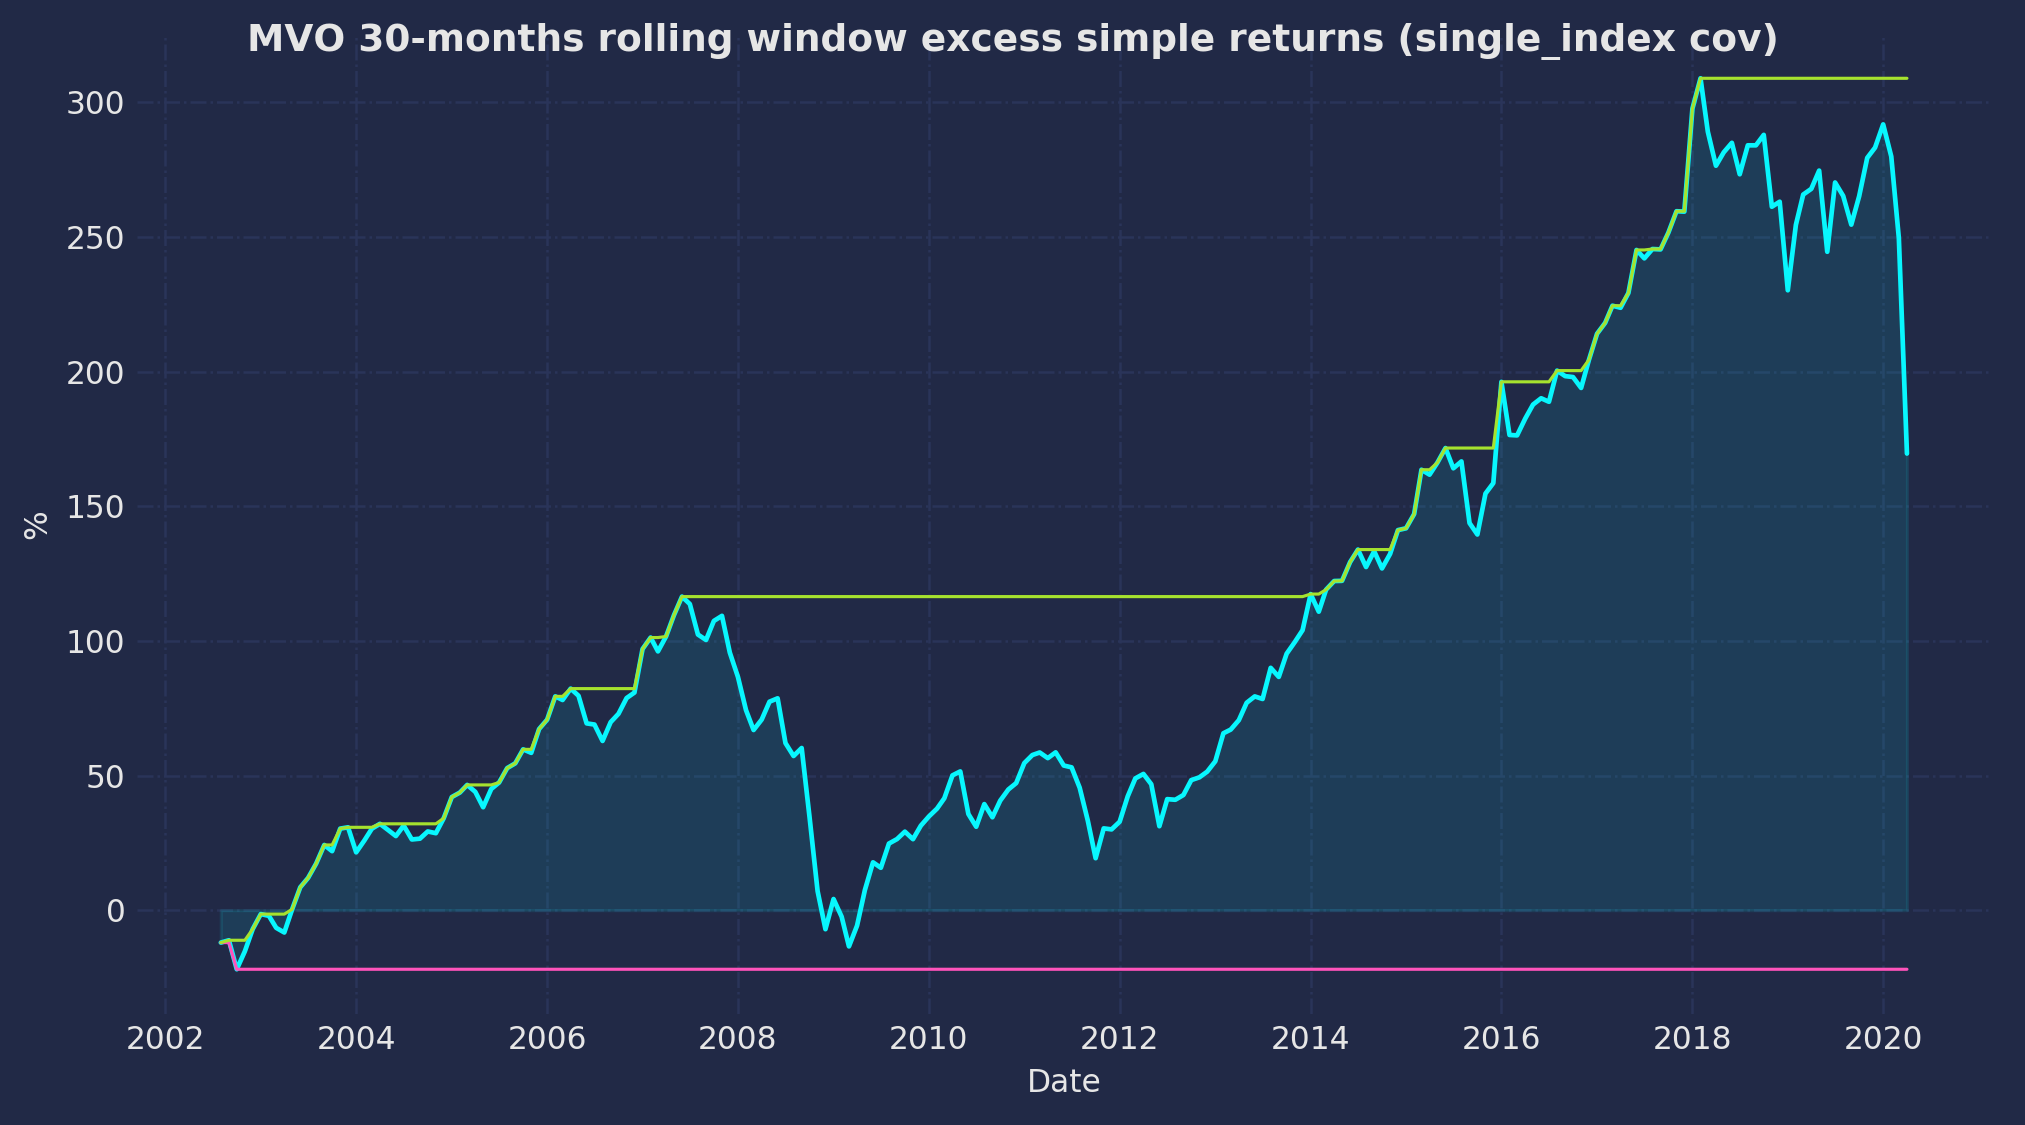

|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.50th iteration...
	|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.100th iteration...
	|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.150th iteration...
	|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.200th iteration...
	|.|.|.|.|.|.|.

In [4]:
mvo_e_30_si = OptimizedPortfolio(prices=p.copy(), mv=mv.copy(), rf=rf.copy(),
                                 excess=True,
                                 rolling_window=30,
                                 scheme='mean_variance',
                                 logreturns=False,
                                 cov_estimation_method='single_index',
                                 verbose=True,
                                 visualize_backtest=True)

	Iteration over 214 windows:
	

<IPython.core.display.Javascript object>


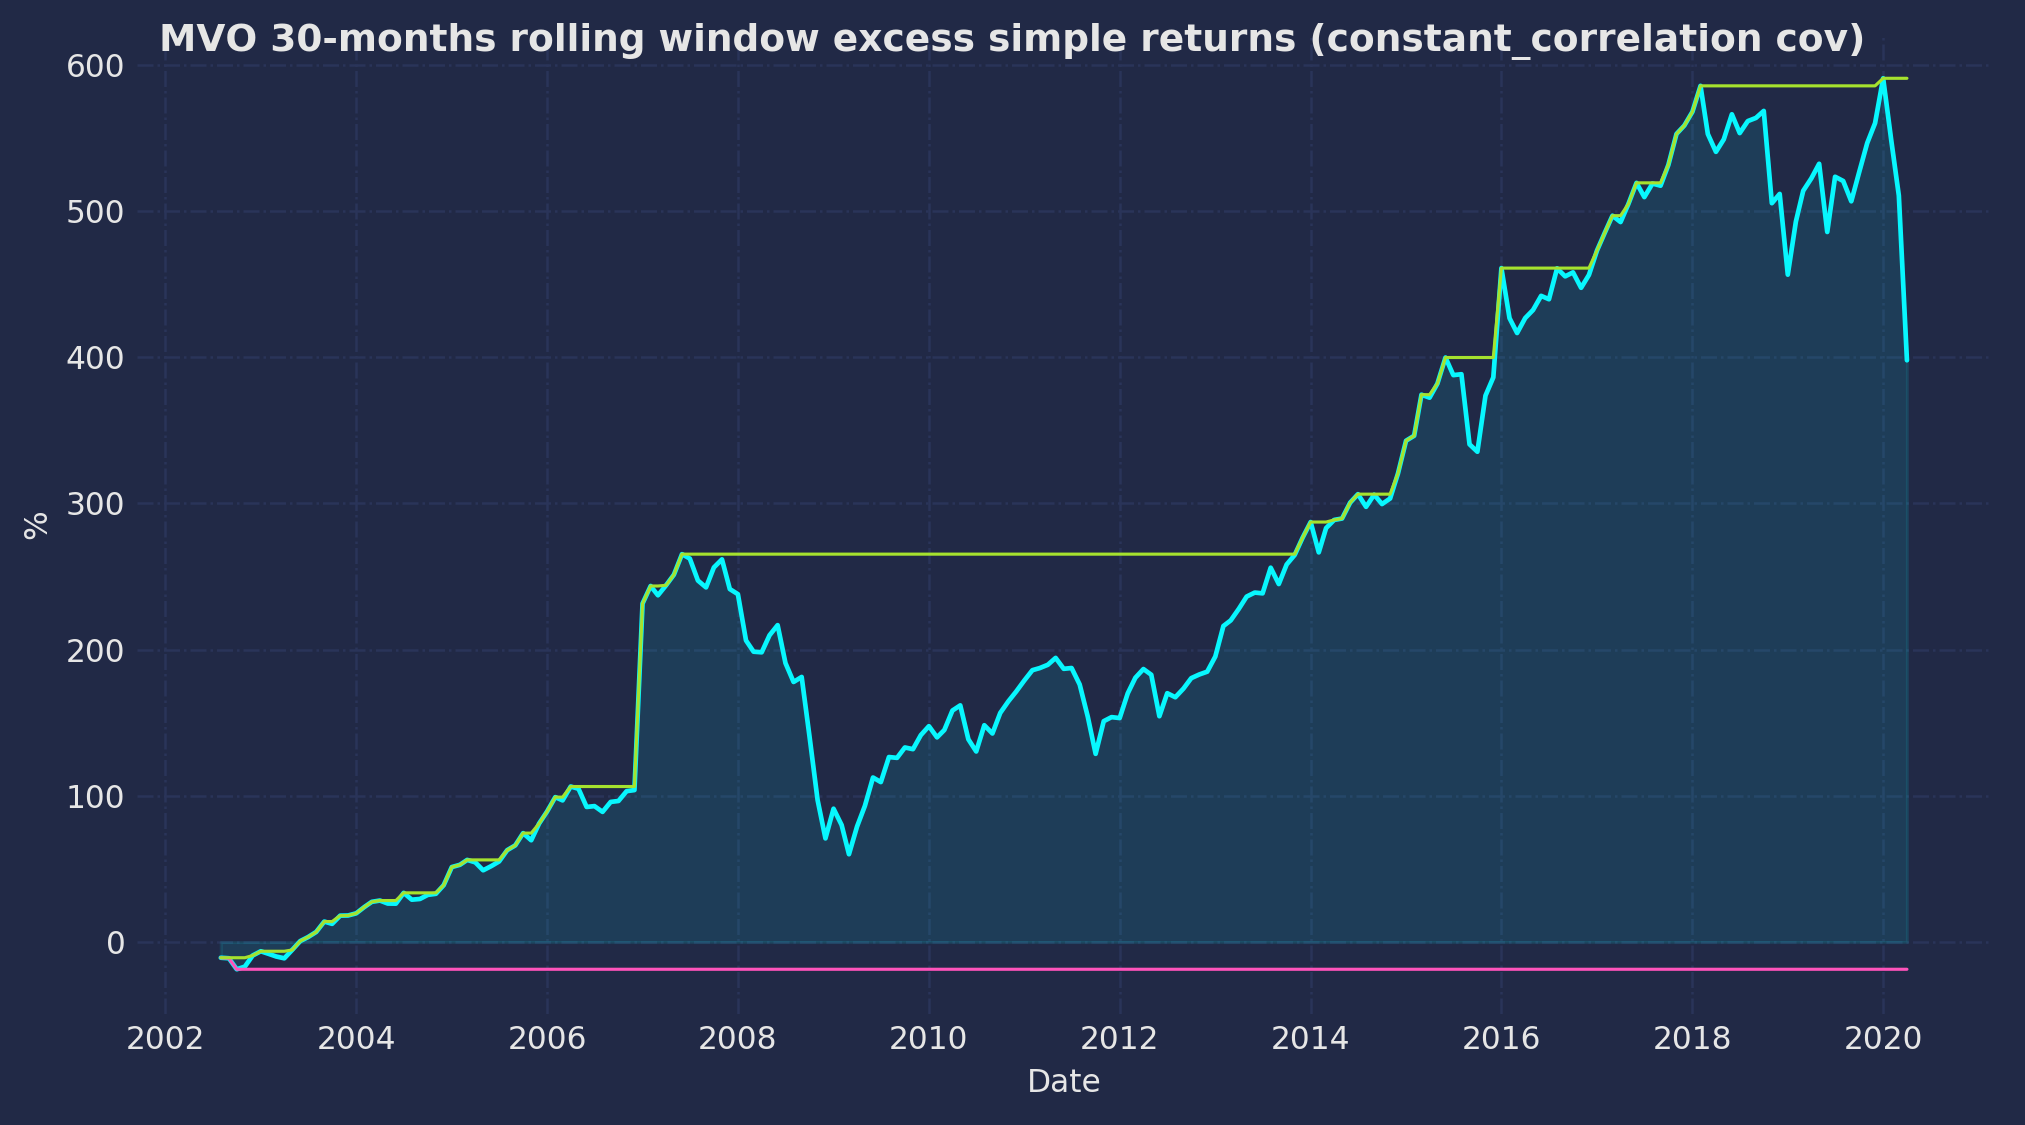

|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.50th iteration...
	|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.100th iteration...
	|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.150th iteration...
	|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.200th iteration...
	|.|.|.|.|.|.|.

In [9]:
mvo_e_30_cc = OptimizedPortfolio(prices=p.copy(), mv=mv.copy(), rf=rf.copy(),
                                 excess=True,
                                 rolling_window=30,
                                 scheme='mean_variance',
                                 logreturns=False,
                                 cov_estimation_method='constant_correlation',
                                 verbose=True,
                                 visualize_backtest=True)

	Iteration over 214 windows:
	

<IPython.core.display.Javascript object>


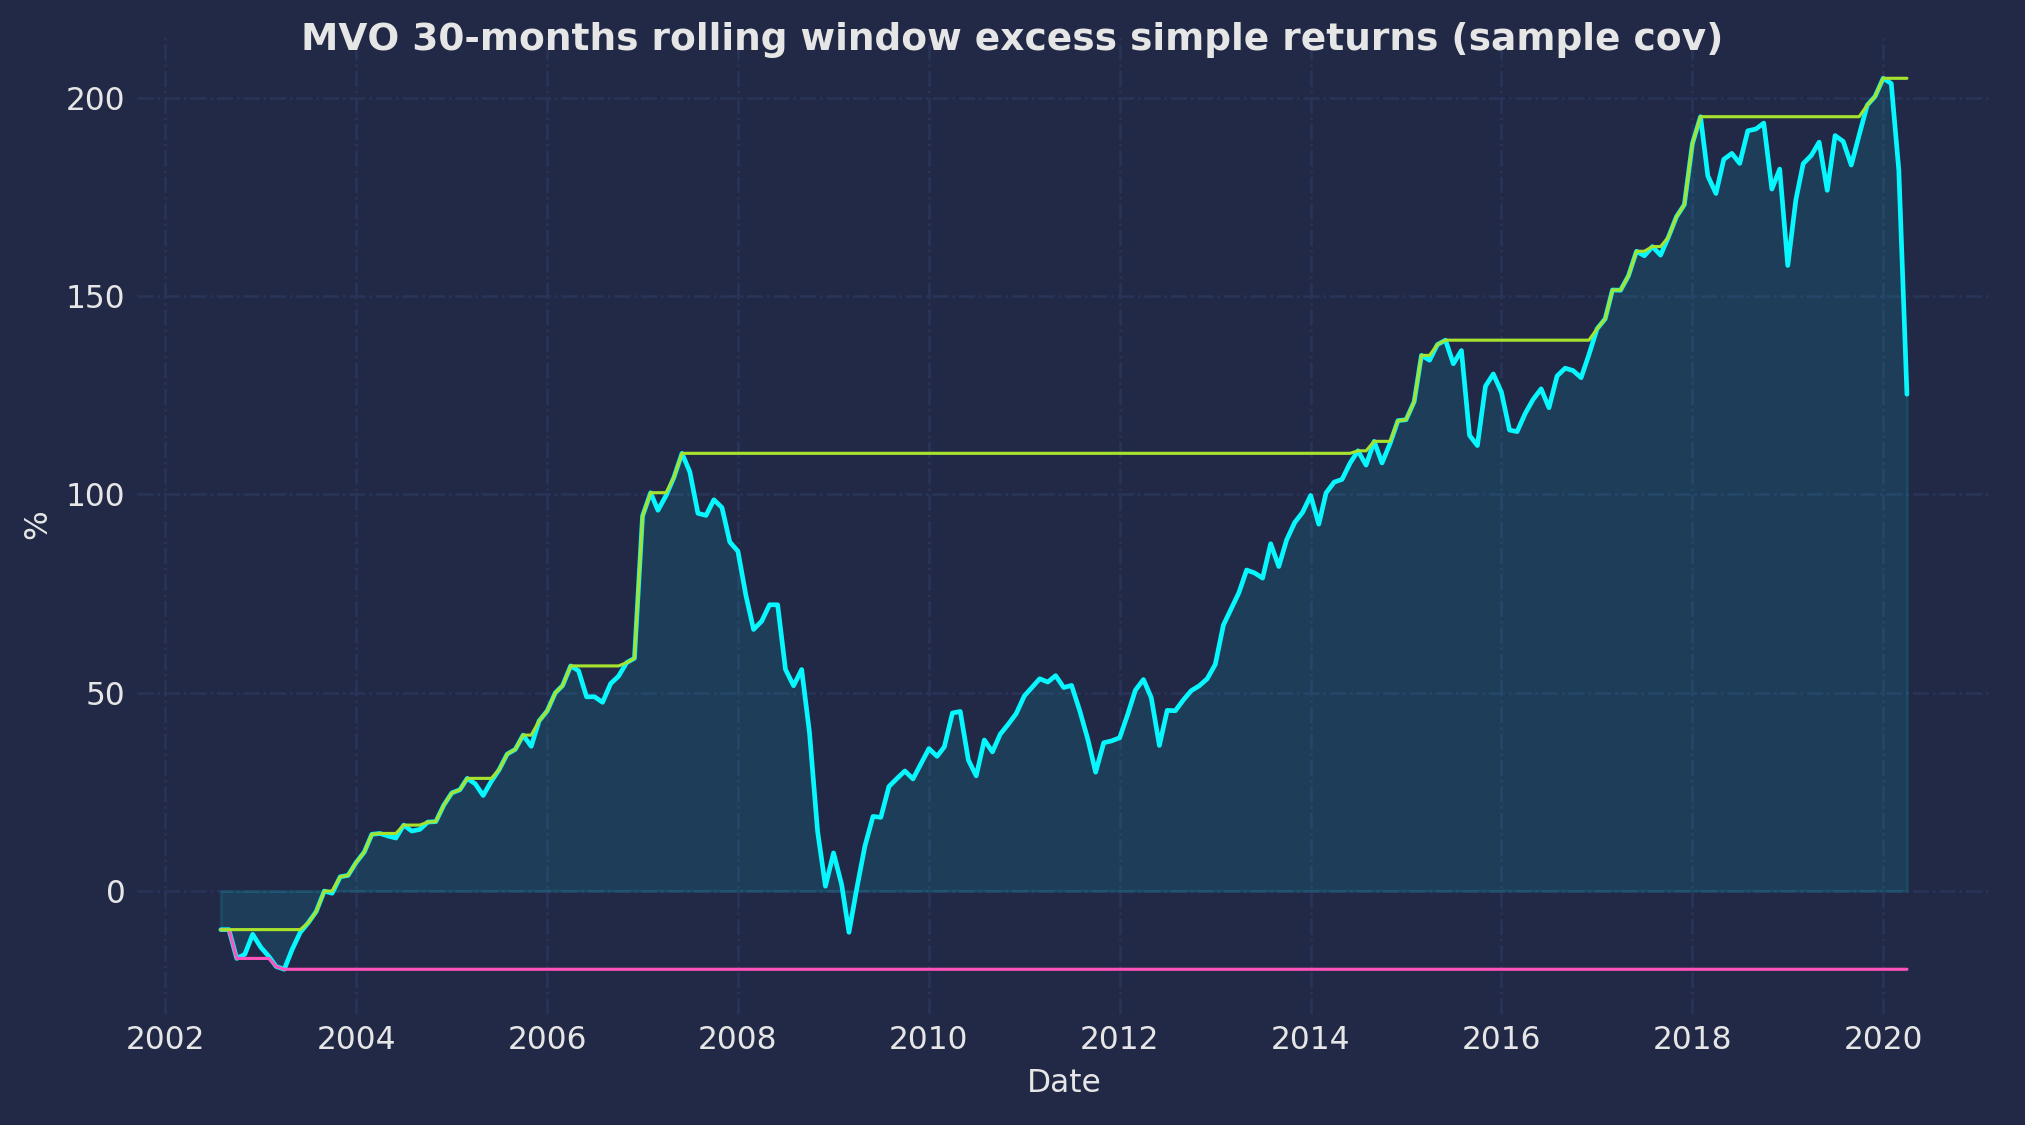

|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.50th iteration...
	|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.100th iteration...
	|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.150th iteration...
	|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.200th iteration...
	|.|.|.|.|.|.|.

In [6]:
mvo_e_30_sa = OptimizedPortfolio(prices=p.copy(), mv=mv.copy(), rf=rf.copy(),
                                 excess=True,
                                 rolling_window=30,
                                 scheme='mean_variance',
                                 logreturns=False,
                                 cov_estimation_method='sample',
                                 verbose=True,
                                 visualize_backtest=True)

	Iteration over 214 windows:
	

<IPython.core.display.Javascript object>


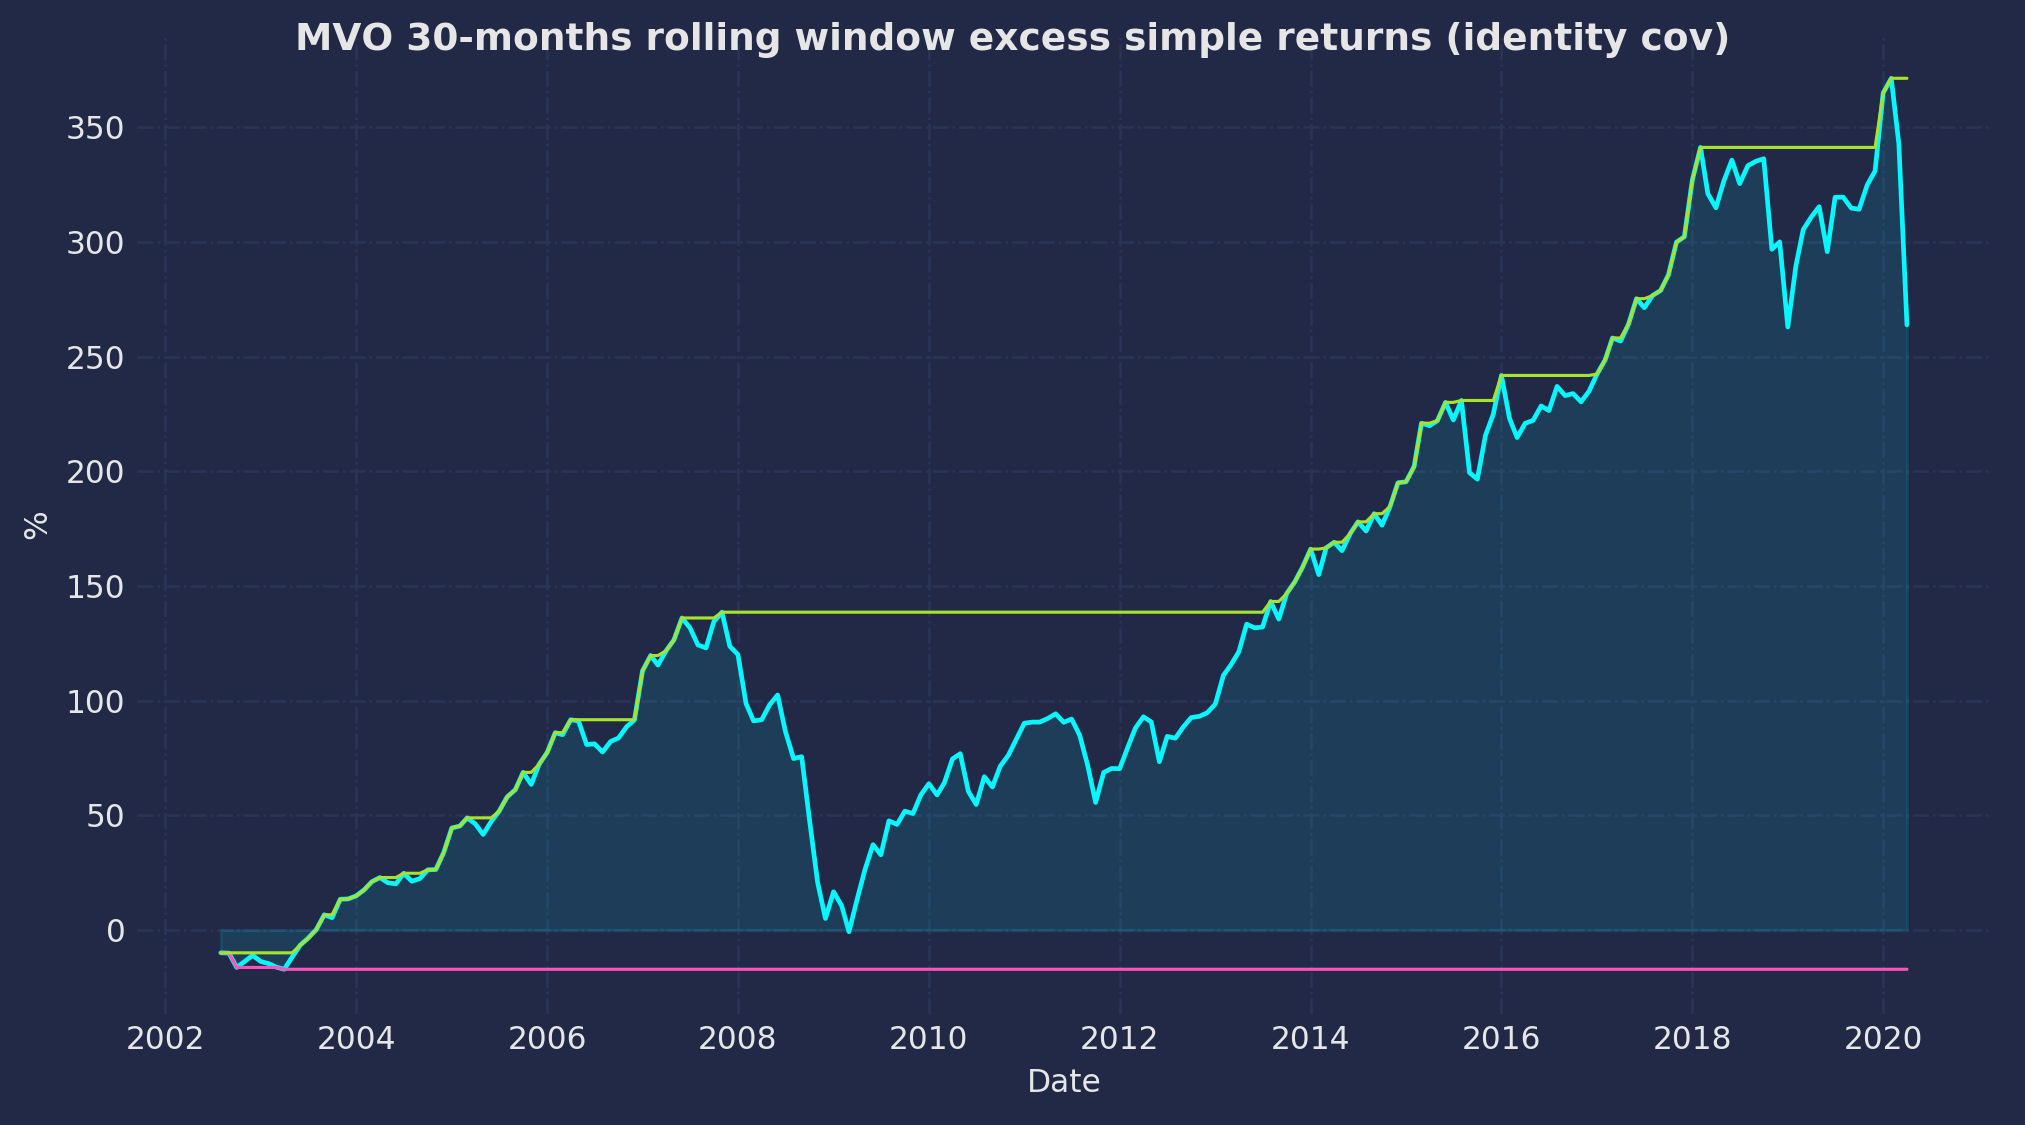

|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.50th iteration...
	|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.100th iteration...
	|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.150th iteration...
	|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.200th iteration...
	|.|.|.|.|.|.|.

In [7]:
mvo_e_30_id = OptimizedPortfolio(prices=p.copy(), mv=mv.copy(), rf=rf.copy(),
                                 excess=True,
                                 rolling_window=30,
                                 scheme='mean_variance',
                                 logreturns=False,
                                 cov_estimation_method='identity',
                                 verbose=True,
                                 visualize_backtest=True)

	Iteration over 214 windows:
	

<IPython.core.display.Javascript object>


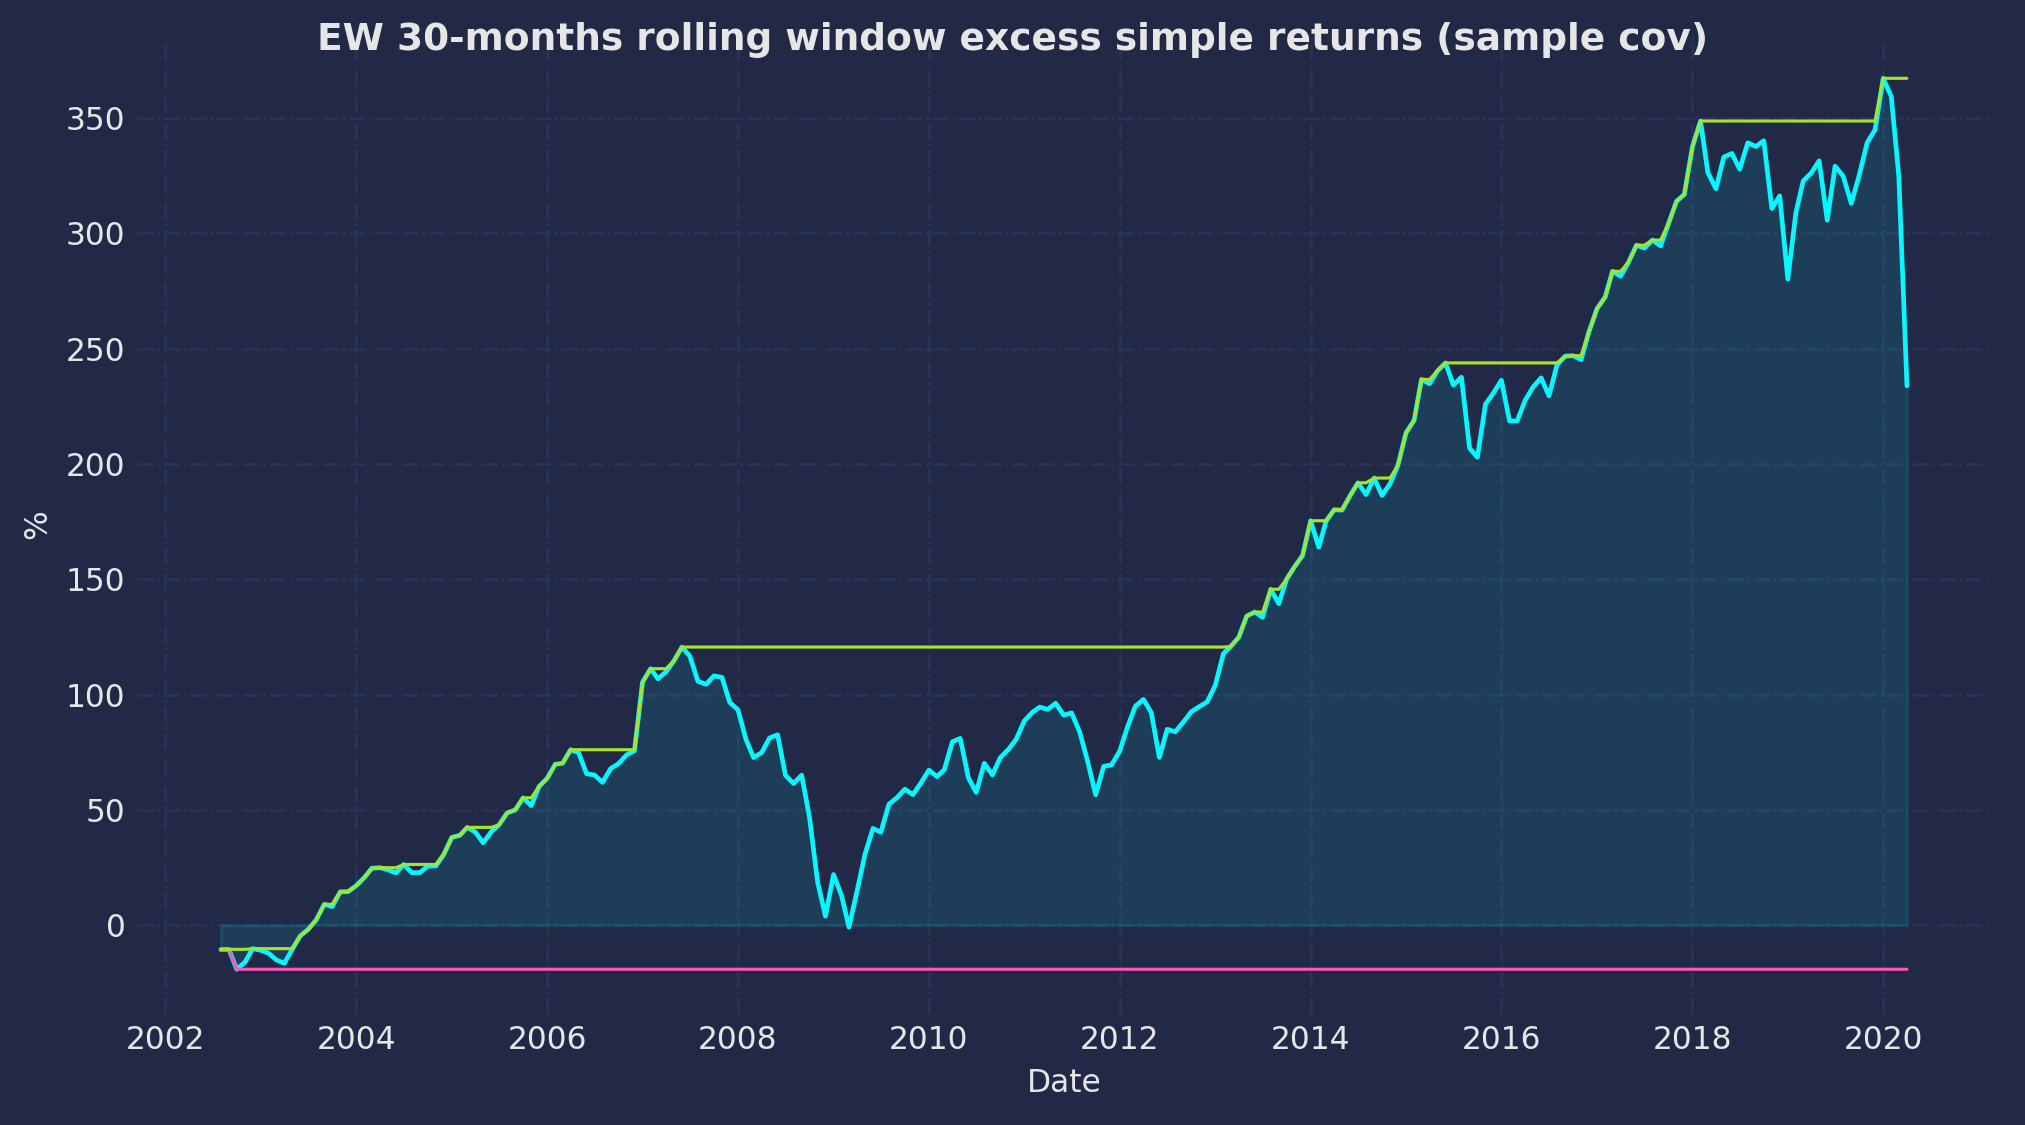

|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.50th iteration...
	|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.100th iteration...
	|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.150th iteration...
	|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.200th iteration...
	|.|.|.|.|.|.|.

In [8]:
ew_e_30 = OptimizedPortfolio(prices=p.copy(), mv=mv.copy(), rf=rf.copy(),
                             excess=True,
                             rolling_window=30,
                             scheme='equally_weighted',
                             logreturns=False,
                             cov_estimation_method='sample',
                             verbose=True,
                             visualize_backtest=True)

	Iteration over 214 windows:
	

<IPython.core.display.Javascript object>


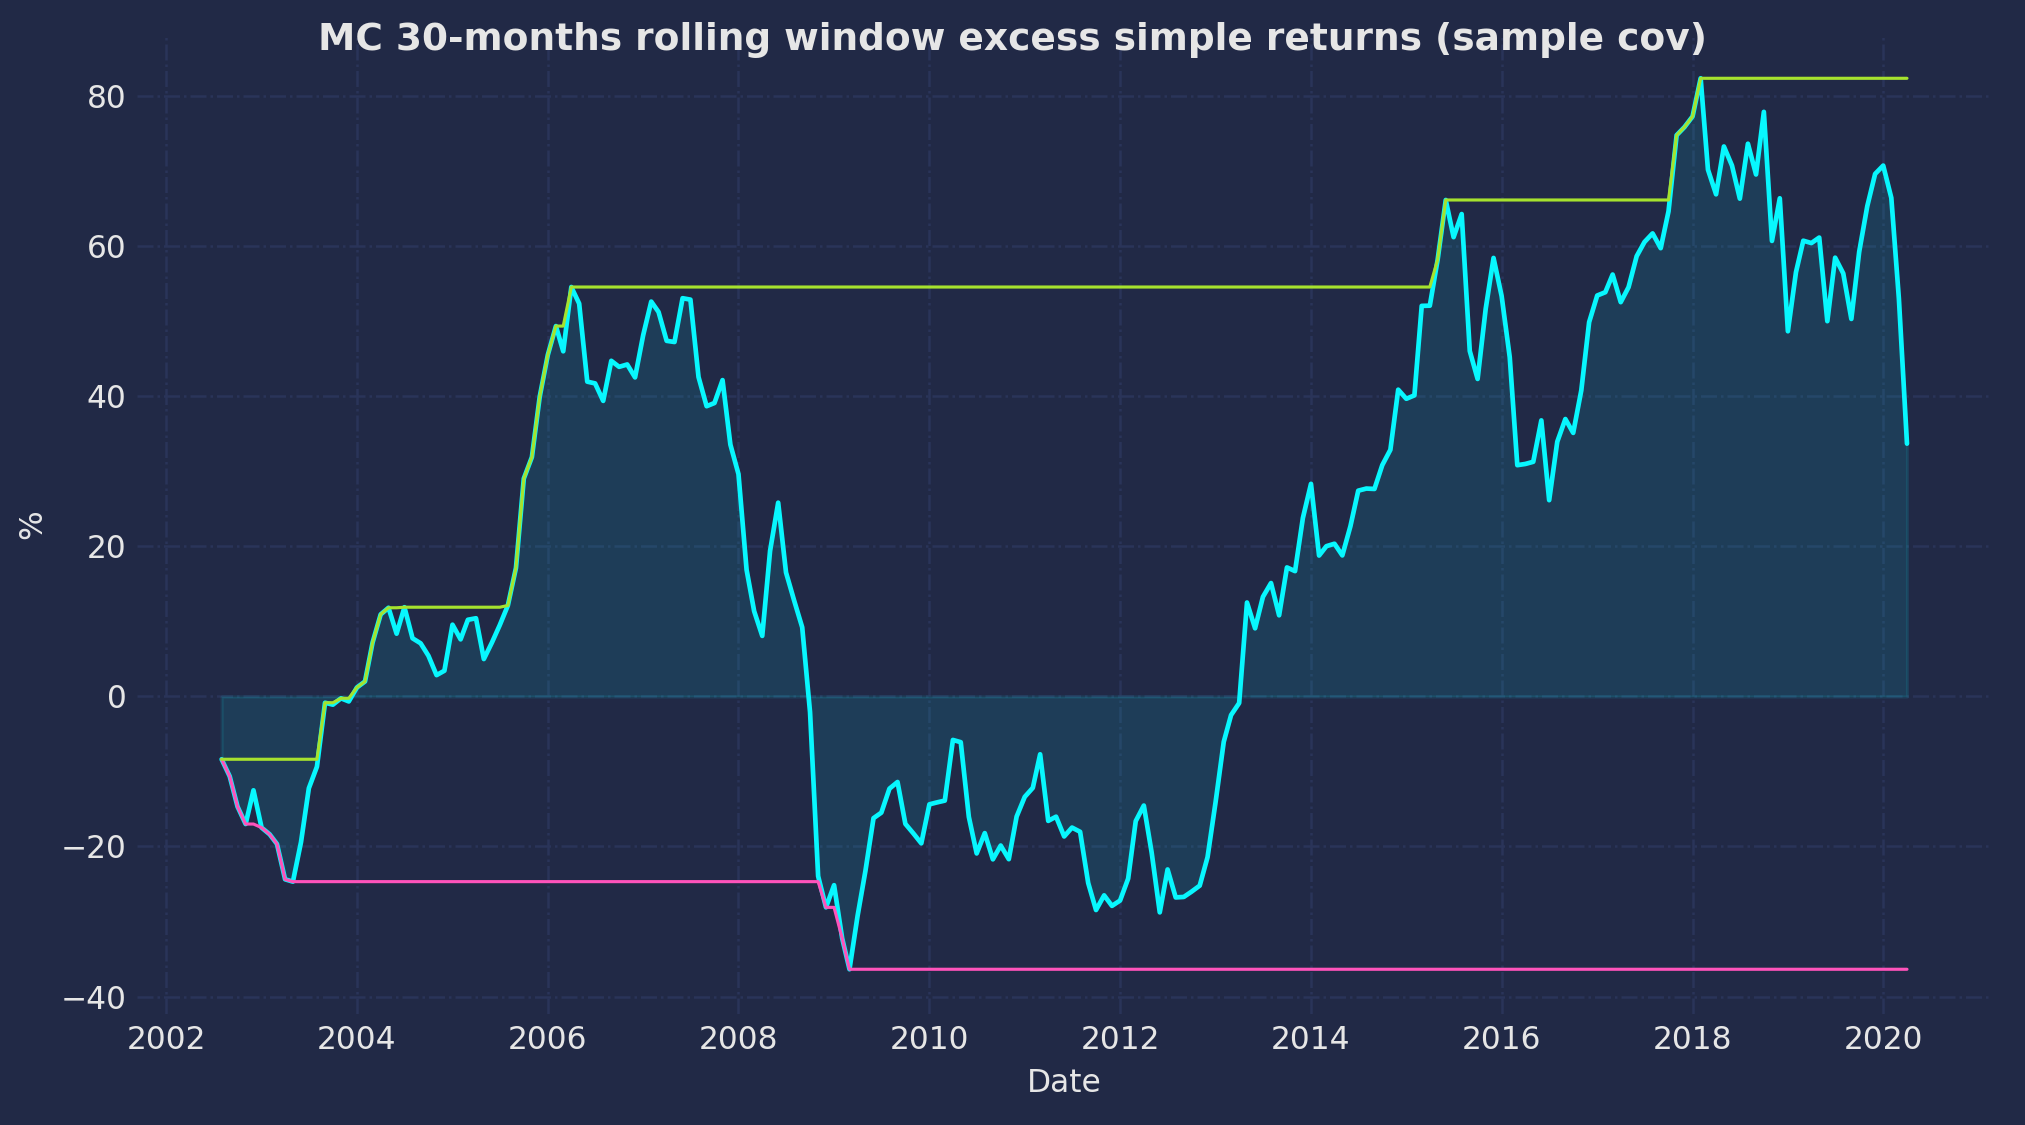

|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.50th iteration...
	|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.100th iteration...
	|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.150th iteration...
	|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.200th iteration...
	|.|.|.|.|.|.|.

In [5]:
mc_e_30 = OptimizedPortfolio(prices=p.copy(), mv=mv.copy(), rf=rf.copy(),
                             excess=True,
                             rolling_window=30,
                             scheme='market_cap_weighted',
                             logreturns=False,
                             cov_estimation_method='sample',
                             verbose=True,
                             visualize_backtest=True)

In [11]:
excess30 = [mvo_e_30_si, mvo_e_30_cc, mvo_e_30_sa, mvo_e_30_id, ew_e_30, mc_e_30]
cumr = []
ptfr = []
weights = []
r = []

for obj in excess30:
    cumr.append(obj.cumulative_portfolio_returns())
    ptfr.append(obj.portfolio_returns())
    weights.append(obj.weights())
    r.append(obj.returns())

cumr_df = pd.concat(cumr, axis=1)
ptfr_df = pd.concat(ptfr, axis=1)
cumr_df.reset_index().rename({'index': 'date'}, axis=1).to_feather(f"{main_dir}data/navs/cumr30.feather")
ptfr_df.reset_index().rename({'index': 'date'}, axis=1).to_feather(f"{main_dir}data/portfolio_returns/ptfr30.feather")